In [2]:
!ls ../zippedData/

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz
im.db.zip               tmdb.movies.csv.gz


In [3]:
import pandas as pd
import sqlite3

In [4]:
df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')

In [5]:
df['foreign_gross'] = df['foreign_gross']. fillna(0)

In [6]:
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [7]:
df['foreign_gross']=df['foreign_gross'].str.replace(',','')

In [8]:
df['total_gross']=(df['domestic_gross'] + df['foreign_gross'].astype(float))

In [9]:
df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN


In [10]:
df['total_gross'] = df['total_gross']. fillna(0)

In [11]:
df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,0.000000e+00
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,0.000000e+00
3384,El Pacto,Sony,2500.0,NaN,2018,0.000000e+00
3385,The Swan,Synergetic,2400.0,NaN,2018,0.000000e+00


In [12]:
pd.read_csv('../zippedData/tmdb.movies.csv.gz').head(20)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [13]:
tn_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

In [14]:
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')

In [15]:
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')

In [16]:
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].astype(int)

In [17]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')

In [18]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')

In [19]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].astype(int)

In [20]:
tn_budgets = tn_budgets.loc[(tn_budgets['production_budget'] >= 50000) & (tn_budgets['worldwide_gross'] != 0)]

In [21]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747
...,...,...,...,...,...,...
5715,16,"Aug 9, 1995",The Brothers McMullen,50000,"$10,426,506",10426506
5716,17,"Mar 16, 2001",Gabriela,50000,"$2,335,352",2335352
5717,18,"Nov 12, 2010",Tiny Furniture,50000,"$391,674",424149
5718,19,"Feb 22, 2008",The Signal,50000,"$251,150",406299


In [22]:
con = sqlite3.connect('../zippedData/im.db')

In [52]:
query = """
SELECT movie_id, primary_title as movie, start_year, runtime_minutes, genres 
FROM movie_basics
WHERE runtime_minutes != 'NaN' AND movie_id != 'NaN' AND primary_title != 'NaN' AND original_title != 'NaN' AND start_year != 'NaN' AND genres != 'NaN'

"""
imdb = pd.read_sql(query, con)

In [53]:
imdb

,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
112227,tt9916160,Drømmeland,2019,72.0,Documentary
112228,tt9916170,The Rehearsal,2019,51.0,Drama
112229,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
112230,tt9916190,Safeguard,2019,90.0,"Drama,Thriller"


In [54]:
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

In [55]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year
5613,14,1980-03-21,madmax,200000,"$8,750,000",99750000,49875.000000,1980
5492,93,2009-09-25,paranormalactivity,450000,"$107,918,810",194183034,43151.785333,2009
5679,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015
5406,7,1999-07-14,theblairwitchproject,600000,"$140,539,099",248300000,41383.333333,1999
5709,10,2004-05-07,supersizeme,65000,"$11,529,368",22233808,34205.858462,2004
...,...,...,...,...,...,...,...,...
3720,21,2010-02-19,thegoodguy,10000000,"$100,688",106460,1.064600,2010
4964,65,1993-01-01,returnofthelivingdead3,2000000,"$21,000",21000,1.050000,1993
2010,11,2013-12-31,spacepiratecaptainharlock,30000000,$0,310985,1.036617,2013
5143,44,2011-05-24,forgetmenot,1300000,$0,13465,1.035769,2011


In [56]:
tn_budgets['ROI %'] = ((tn_budgets['worldwide_gross']/tn_budgets['production_budget'])*100)

In [57]:
tn_budgets = tn_budgets.sort_values('ROI %', ascending=False)

In [58]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year
5613,14,1980-03-21,madmax,200000,"$8,750,000",99750000,49875.000000,1980
5492,93,2009-09-25,paranormalactivity,450000,"$107,918,810",194183034,43151.785333,2009
5679,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015
5406,7,1999-07-14,theblairwitchproject,600000,"$140,539,099",248300000,41383.333333,1999
5709,10,2004-05-07,supersizeme,65000,"$11,529,368",22233808,34205.858462,2004
...,...,...,...,...,...,...,...,...
3720,21,2010-02-19,thegoodguy,10000000,"$100,688",106460,1.064600,2010
4964,65,1993-01-01,returnofthelivingdead3,2000000,"$21,000",21000,1.050000,1993
2010,11,2013-12-31,spacepiratecaptainharlock,30000000,$0,310985,1.036617,2013
5143,44,2011-05-24,forgetmenot,1300000,$0,13465,1.035769,2011


In [59]:
tn_budgets = tn_budgets.loc[tn_budgets['ROI %'] > 1]

In [60]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year
5613,14,1980-03-21,madmax,200000,"$8,750,000",99750000,49875.000000,1980
5492,93,2009-09-25,paranormalactivity,450000,"$107,918,810",194183034,43151.785333,2009
5679,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015
5406,7,1999-07-14,theblairwitchproject,600000,"$140,539,099",248300000,41383.333333,1999
5709,10,2004-05-07,supersizeme,65000,"$11,529,368",22233808,34205.858462,2004
...,...,...,...,...,...,...,...,...
3720,21,2010-02-19,thegoodguy,10000000,"$100,688",106460,1.064600,2010
4964,65,1993-01-01,returnofthelivingdead3,2000000,"$21,000",21000,1.050000,1993
2010,11,2013-12-31,spacepiratecaptainharlock,30000000,$0,310985,1.036617,2013
5143,44,2011-05-24,forgetmenot,1300000,$0,13465,1.035769,2011


In [61]:
tn_budgets['start_year'] = pd.DatetimeIndex(tn_budgets['release_date']).year

In [62]:
tn_budgets['movie'] = tn_budgets['movie'].str.lower()

In [63]:
tn_budgets['movie'] = tn_budgets['movie'].str.replace(" ","")

In [64]:
imdb['movie'] = imdb['movie'].str.lower()

In [65]:
imdb['movie'] = imdb['movie'].str.replace(" ","")

In [67]:
runtime_ROI = pd.merge(tn_budgets, imdb, on=['movie', 'start_year'])

In [68]:
runtime_ROI

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year,movie_id,runtime_minutes,genres
0,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015,tt2309260,81.0,"Horror,Mystery,Thriller"
1,12,2012-01-06,thedevilinside,1000000,"$53,262,945",101759490,10175.949000,2012,tt1560985,83.0,Horror
2,65,2010-10-20,paranormalactivity2,3000000,"$84,752,907",177512032,5917.067733,2010,tt1536044,91.0,Horror
3,49,2017-02-24,getout,5000000,"$176,040,665",255367951,5107.359020,2017,tt5052448,104.0,"Horror,Mystery,Thriller"
4,64,2016-10-21,moonlight,1500000,"$27,854,931",65245512,4349.700800,2016,tt4975722,111.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...
1408,1,2010-12-10,thetempest,20000000,"$277,943",277943,1.389715,2010,tt1683003,131.0,Drama
1409,51,2014-04-18,13sins,4000000,"$9,134",47552,1.188800,2014,tt2059171,93.0,"Horror,Thriller"
1410,57,2014-03-28,locker13,300000,"$3,496",3496,1.165333,2014,tt1241226,90.0,Thriller
1411,25,2011-12-31,thekick,3500000,$0,40622,1.160629,2011,tt2020110,94.0,"Action,Sport"


In [80]:
runtime_ROI.sort_values('ROI %', ascending=True).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year,movie_id,runtime_minutes,genres
1412,20,2010-02-19,blooddonesignmyname,10000000,"$109,383",109383,1.093830,2010,tt1210039,128.0,Drama
1411,25,2011-12-31,thekick,3500000,$0,40622,1.160629,2011,tt2020110,94.0,"Action,Sport"
1410,57,2014-03-28,locker13,300000,"$3,496",3496,1.165333,2014,tt1241226,90.0,Thriller
1409,51,2014-04-18,13sins,4000000,"$9,134",47552,1.188800,2014,tt2059171,93.0,"Horror,Thriller"
1407,1,2010-12-10,thetempest,20000000,"$277,943",277943,1.389715,2010,tt1274300,110.0,"Comedy,Drama,Fantasy"
1408,1,2010-12-10,thetempest,20000000,"$277,943",277943,1.389715,2010,tt1683003,131.0,Drama
1406,73,2013-09-13,plush,2000000,"$3,080",28864,1.443200,2013,tt2226519,99.0,"Drama,Music,Thriller"
1405,85,2014-12-05,dyingofthelight,5000000,$0,74639,1.492780,2014,tt1274586,94.0,"Drama,Thriller"
1404,13,2016-09-09,kicks,10000000,"$150,191",150191,1.501910,2016,tt4254584,80.0,"Adventure,Drama"
1403,23,2015-12-31,julijainalfaromeo,560000,$0,8462,1.511071,2015,tt4374230,83.0,Comedy


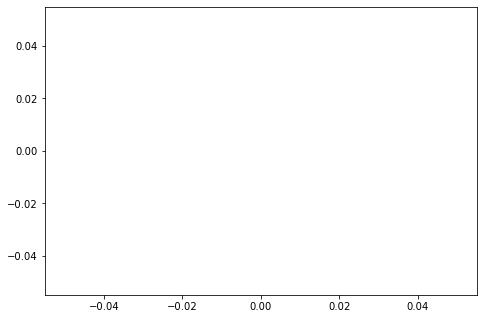

In [82]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
runtime = []
ROI = []
ax.bar(runtime,ROI)
plt.show()

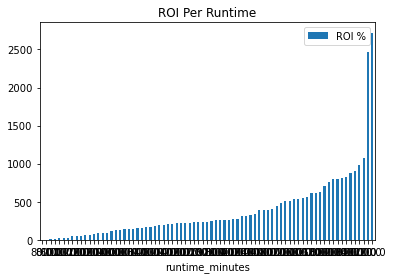

In [91]:
x = 'runtime_minutes'
y = 'ROI %'

subset = runtime_ROI[runtime_ROI["runtime_minutes"].isin([
    "40", "60", "80", "100", "120", "140", "160", "180"
])]

grouped_by_runtime = subset.groupby("ROI %").mean().reset_index()
ax = grouped_by_runtime.plot.bar(x=x, y=y, rot=0, title="ROI Per Runtime");